In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Context and Networks
###### In Network Science the distribution of a measure (degree, clustering, closeness, ... ) is useful for network characterization.
###### In this Notebook is developed a function that plots any distribution in 4 different ways. To exemplify Its use, random and scale-free networks are generated. The degree and clustering distribution of each network are plotted using the function.
###### The idea to show 4 different ways to plot distribution is to give an overview and help the choosing of the best way to present the distribution.
###### Both networks have the same number of nodes and a very similar number of edges.

In [2]:
random = nx.erdos_renyi_graph(10000,0.0006)
random.name="erdos_renyi_graph(10000,0.0006)"
print(nx.info(random))

Name: erdos_renyi_graph(10000,0.0006)
Type: Graph
Number of nodes: 10000
Number of edges: 29982
Average degree:   5.9964


In [3]:
powerLaw = nx.barabasi_albert_graph(10000,3)
powerLaw.name="barabasi_albert_graph(10000,3)"
print(nx.info(powerLaw))

Name: barabasi_albert_graph(10000,3)
Type: Graph
Number of nodes: 10000
Number of edges: 29991
Average degree:   5.9982


# Distribution Plotting Function
###### It is a generic function that requires a list and two optional labels for X and Y axes. The idea is to present a code that can be adjusted for a more specific purpose.

In [4]:
def distributionPlotting(distribution, yLabel='', xLabel=''): 
    distribution=sorted(distribution,reverse=True)
    #General information
    info={}
    info['N']=len(distribution)
    info['Mean']= round(np.mean(distribution),2)
    info['Q1']= round(np.percentile(distribution,25),2)
    info['Q2']= round(np.percentile(distribution,50),2)
    info['Q3']= round(np.percentile(distribution,75),2)
    info['Max']= max(distribution)
   
    resume = str(info).replace('{','').replace('}','').replace('\'','').replace(',',' |')

    #========PLOTS====PLOTS=====PLOTS==========

    fig, ax = plt.subplots(2,2,figsize=(15, 15))
    fig.suptitle(str(yLabel)+' Distribution \n'+resume, fontsize=16)

    ####-------------------Linear Scale
    plt.sca(ax[0,0])
    ax[0,0].plot(distribution,'.')
    ax[0,0].set_title('Linear Scale')
    ax[0,0].set_xlabel(xLabel)
    ax[0,0].set_ylabel(yLabel)

    # THE OTHERS PLOTS SHOW THE PROBABILITY OF EACH UNIQUE VALUE IN THE DISTRIBUTION HAPPENS
    #Frequence of each value
    freq={}
    length = len(distribution)
    for v in distribution:
        if(v in freq):
            freq[v]+=1
        else:
            freq[v]=1
            
    #Probability of a 'd' value happens
    pk={}        
    for f in freq:
        pk[f]=freq[f]/length 
    x=list(pk.keys())
    y=list(pk.values())
    
    ####-------------------Probability Linear
    plt.sca(ax[0,1])
    ax[0,1].plot(x,y,'.')
    ax[0,1].set_title('Probability Linear')
    ax[0,1].set_xlabel(xLabel)
    ax[0,1].set_ylabel('P('+yLabel+')')

    ####-------------------Probability LogLog
    plt.sca(ax[0,1])
    ax[1,0].loglog(x,y,'o')
    ax[1,0].set_title('Probability LogLog')
    ax[1,0].set_xlabel(xLabel)
    ax[1,0].set_ylabel('P('+yLabel+')')


    ####------------------Cumulative Probability
    plt.sca(ax[1,1])
    #cumulative degree distribution
    xAxes=[]
    yAxes=[]
    cum=0
    #pk was calculated above
    for k,v in pk.items():
        cum+=v
        xAxes.append(k)
        yAxes.append(cum)
    ax[1,1].loglog(xAxes,yAxes,'o')
    ax[1,1].set_title('Cumulative')
    ax[1,1].set_xlabel(xLabel)
    ax[1,1].set_ylabel('CP('+yLabel+')')

    plt.show()

# Degree Distribution

########### Scale-Free


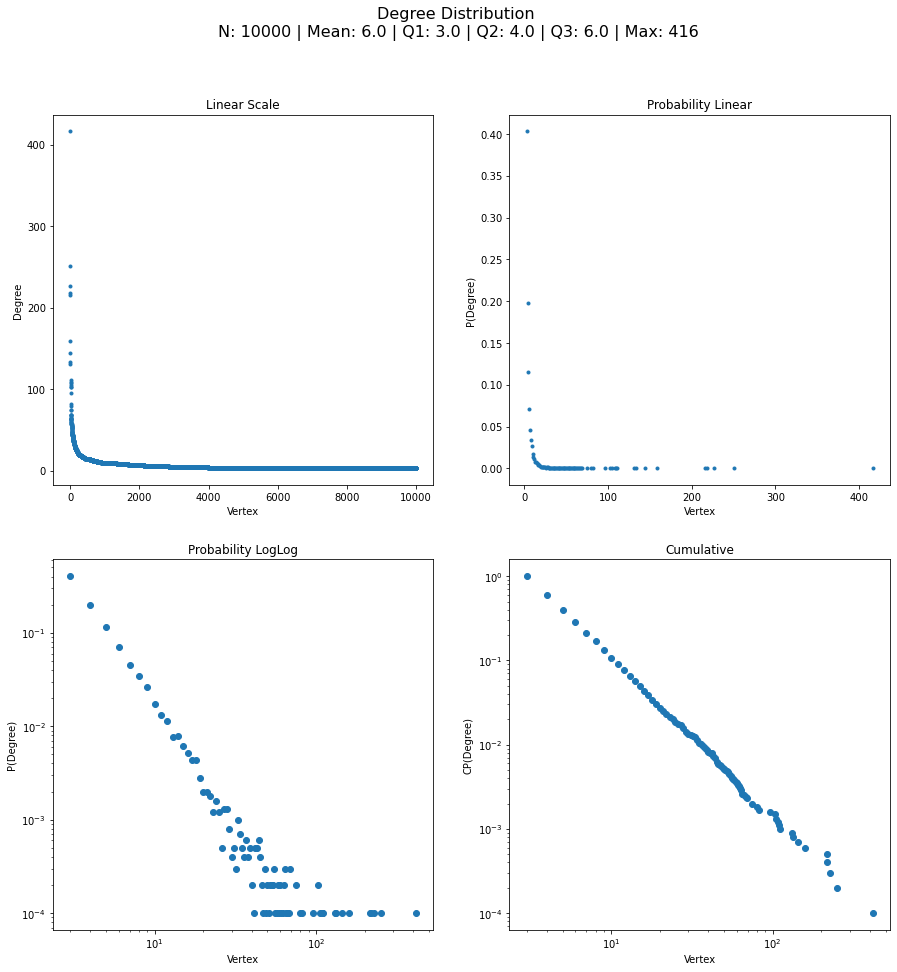

########### Random


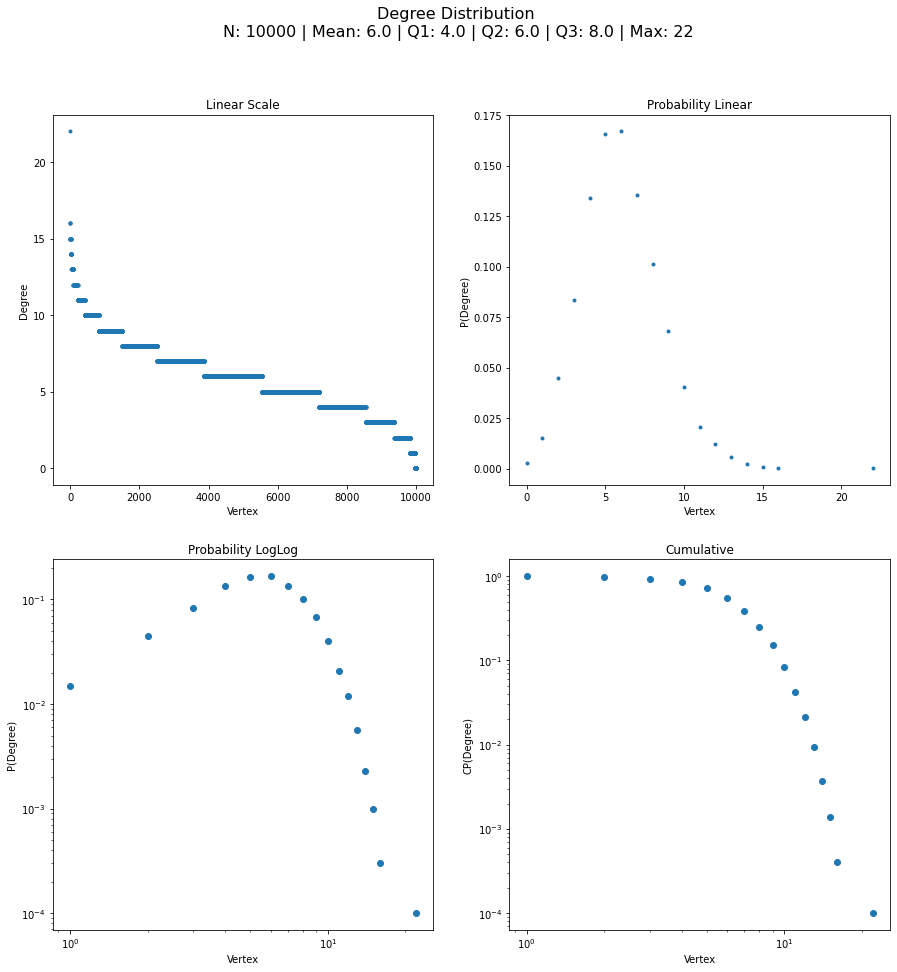

In [5]:
print("########### Scale-Free")
degreeDist = list(dict(powerLaw.degree).values())
distributionPlotting(degreeDist,yLabel='Degree',xLabel='Vertex')
print("########### Random")
degreeDist = list(dict(random.degree).values())
distributionPlotting(degreeDist,yLabel='Degree',xLabel='Vertex')

# Clustering Distribution
###### The degree of a node is an integer number, but the clustering is a real number between 0 and 1. Considering that in Python float numbers have 16 digits of precision, It's necessary to 'fit' the distribution in a range that close values are count together.

## Fitting the distribution in a range

In [6]:
#Without Fitting



clust = nx.clustering(powerLaw).values()
[x for x in clust]

[0.002866013852400287,
 0.002620802620802621,
 0.001932367149758454,
 0.0026772908366533865,
 0.0022706209453197406,
 0.003044011330486619,
 0.004578754578754579,
 0.00268995360804647,
 0.008130081300813009,
 0.013227513227513227,
 0.012307692307692308,
 0.006274509803921568,
 0.0019810508182601205,
 0.0017088174982911825,
 0.004234724742891712,
 0.002284408909194746,
 0.0142602495543672,
 0.003896103896103896,
 0.0019230769230769232,
 0.008456659619450317,
 0.0015290519877675841,
 0.005537098560354375,
 0.002795248078266946,
 0.0037974683544303796,
 0.003484320557491289,
 0.0020396270396270395,
 0,
 0.007352941176470588,
 0.0024229837313949464,
 0.003472222222222222,
 0.002560163850486431,
 0.0011074197120708748,
 0.0020964360587002098,
 0.0010964912280701754,
 0.003171247357293869,
 0.002284408909194746,
 0.00641025641025641,
 0.0025575447570332483,
 0.0026455026455026454,
 0.009009009009009009,
 0.002699055330634278,
 0.0010569583088667059,
 0.013257575757575758,
 0.0005649717514124

In [7]:
#With Fitting
fitRange = 20
fittedDist=[]
for c in clust:
    fittedDist.append(int(c * fitRange)/fitRange)
fittedDist

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

###### Scale-Free 


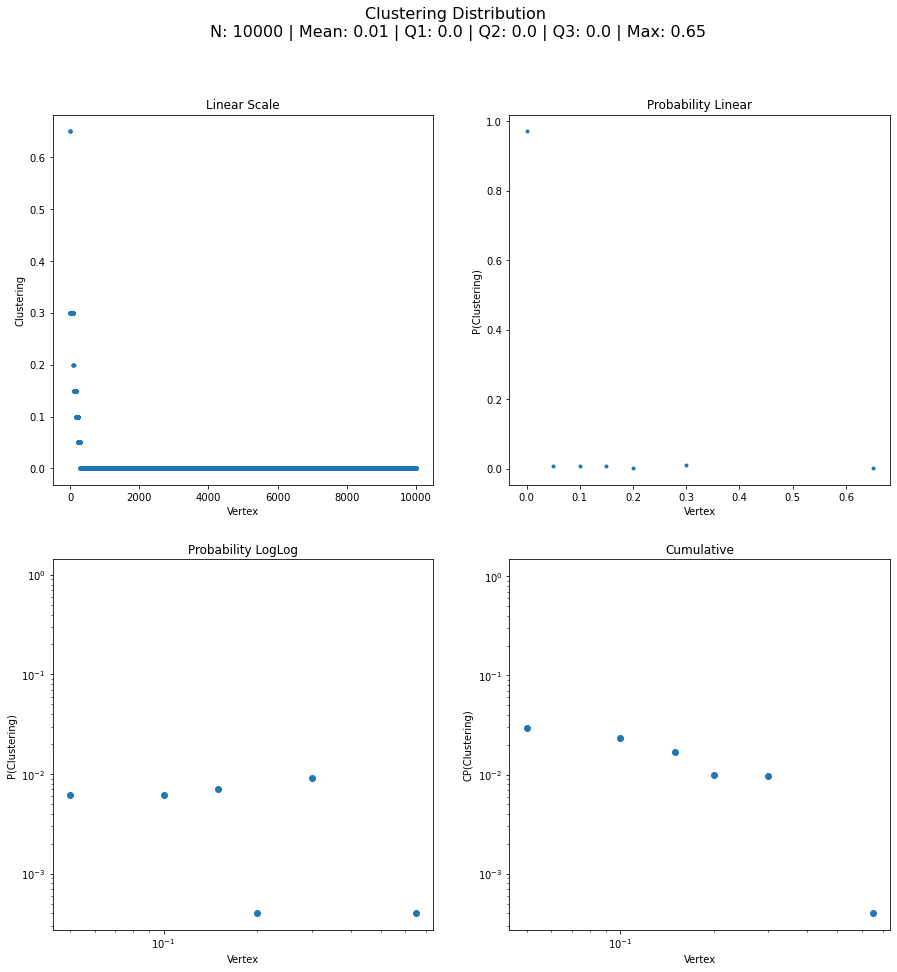

###### Random 


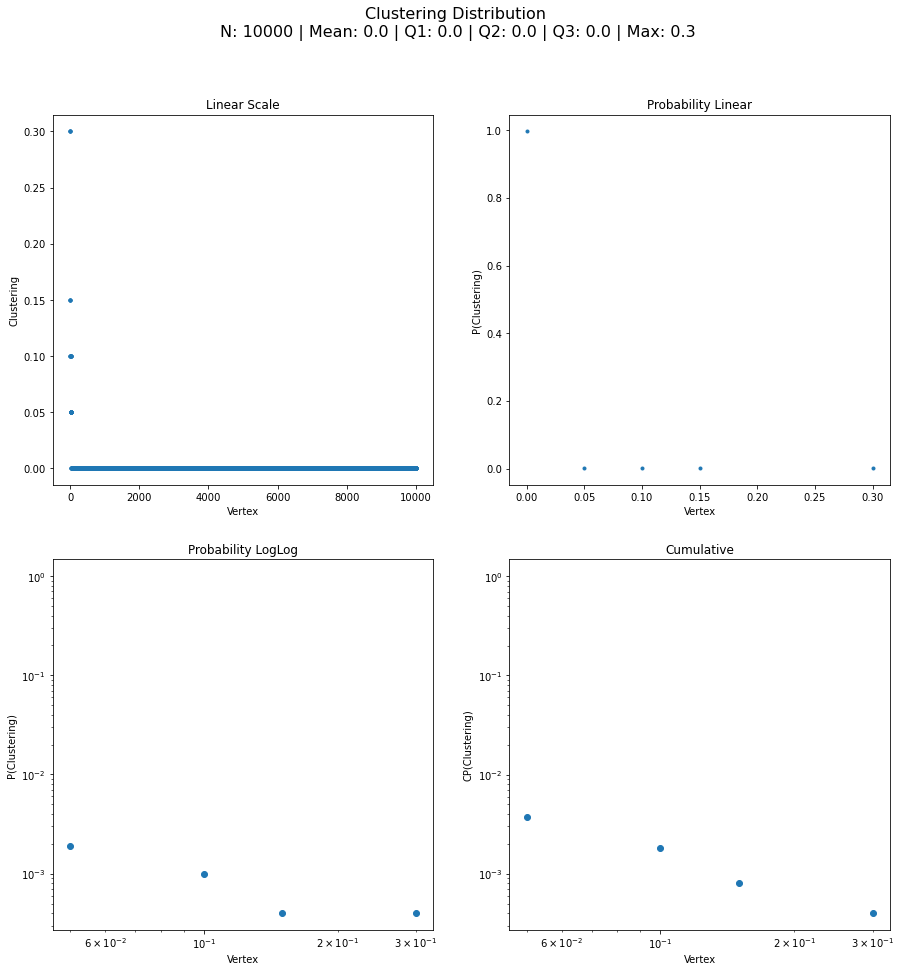

In [8]:
print("###### Scale-Free ")
clust = nx.clustering(powerLaw).values()
fitRange = 20
fittedDist=[]
for c in clust:
    fittedDist.append(int(c * fitRange)/fitRange)
fittedDist
distributionPlotting(fittedDist,yLabel='Clustering',xLabel='Vertex')

print("###### Random ")
clust = nx.clustering(random).values()
fitRange = 20
fittedDist=[]
for c in clust:
    fittedDist.append(int(c * fitRange)/fitRange)
fittedDist
distributionPlotting(fittedDist,yLabel='Clustering',xLabel='Vertex')

# Plotting Real PPI Network
###### The above synthetic networks are known to have low clustering. For a real example, the Protein-Protein Interaction (PPI) network of Klebsiella Pneumoniae bacteria is plotted.
###### This network is from STRING: https://string-db.org/

In [9]:
bacteria =nx.read_gml("datasets/ProteinProteinInteractionNetwork_KlebsiellaPneumoniae.gml")
bacteria.name='KlebsiellaPneumoniae'
print(nx.info(bacteria))

Name: KlebsiellaPneumoniae
Type: Graph
Number of nodes: 3546
Number of edges: 12529
Average degree:   7.0666


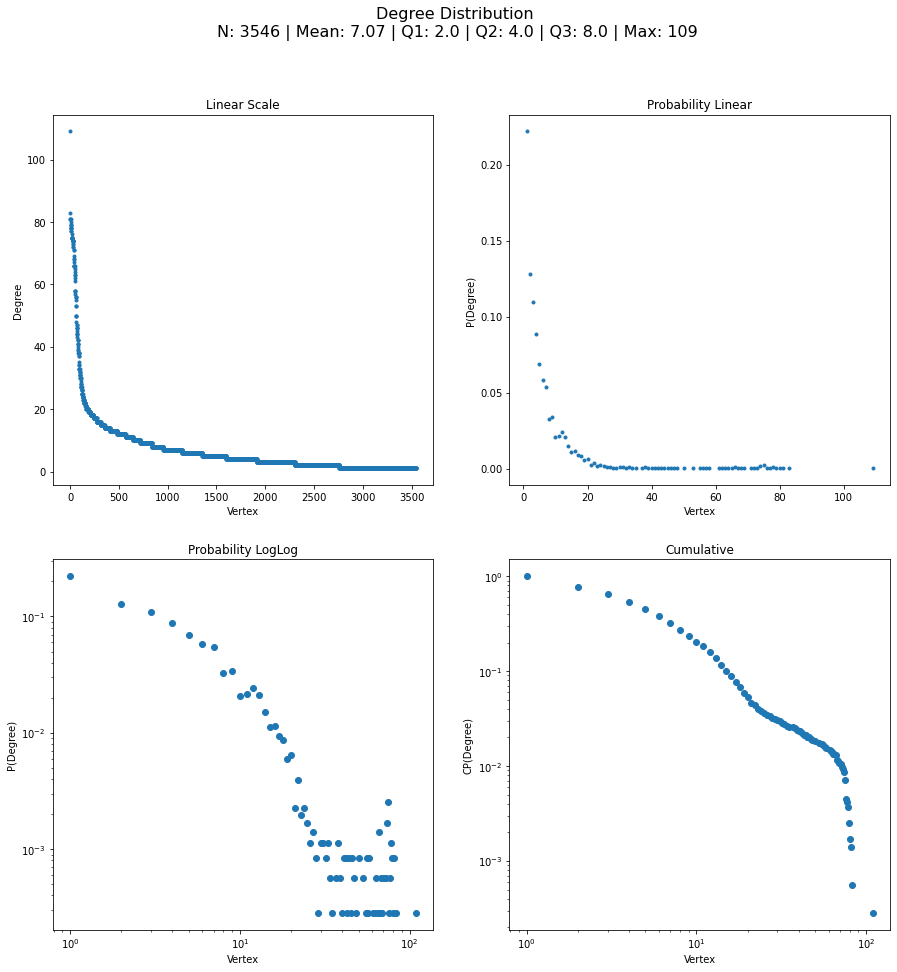

In [10]:
degreeDist = list(dict(bacteria.degree).values())
distributionPlotting(degreeDist,yLabel='Degree',xLabel='Vertex')

######## Clustering Without Fitting


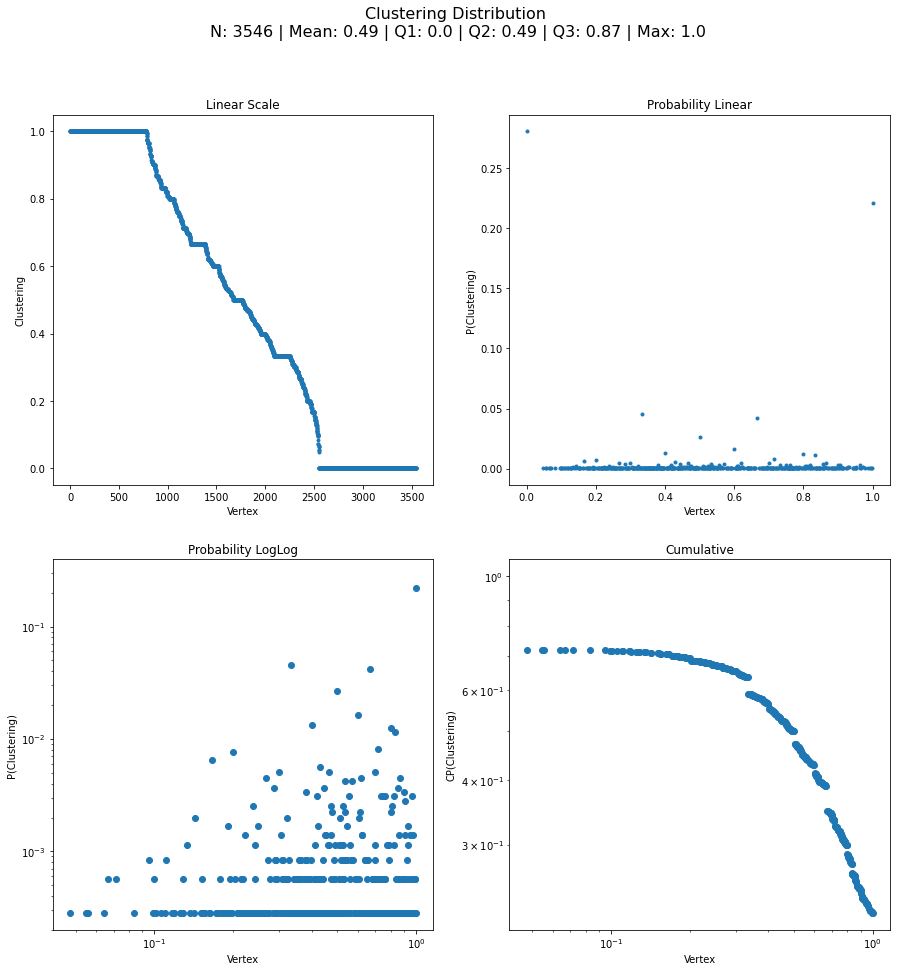

######## Clustering With Fitting


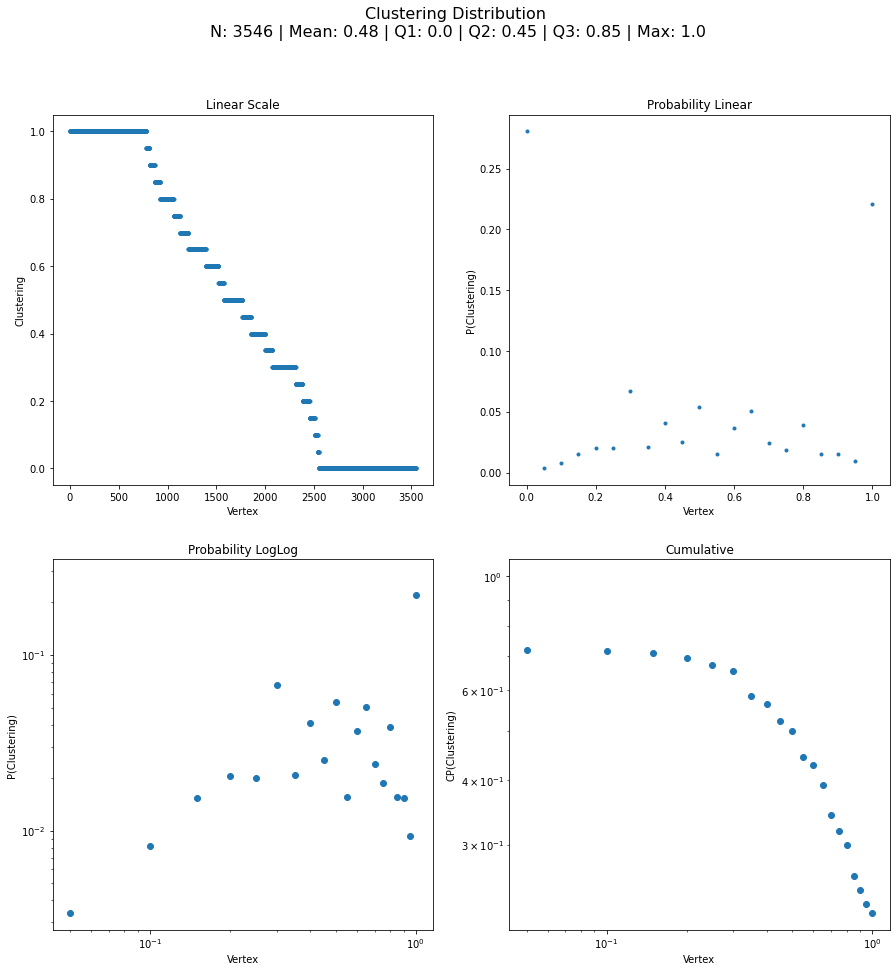

In [11]:
clust = nx.clustering(bacteria).values()
print("######## Clustering Without Fitting")
distributionPlotting(clust,yLabel='Clustering',xLabel='Vertex')

print("######## Clustering With Fitting")
fitRange = 20
fittedDist=[]
for c in clust:
    fittedDist.append(int(c * fitRange)/fitRange)
distributionPlotting(fittedDist,yLabel='Clustering',xLabel='Vertex')